# Importation des packages

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Import Regex to clean up tweets
import re
import nltk, string
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Importation des données

Ajoutez un raccourci de ce dossier à votre google drive :

https://drive.google.com/drive/folders/1mx-CAzT10YKrmxHfYDP_1Oef7PVGUr7s?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import pandas as pd
data = pd.read_csv('data_classification_commentaires_toxiques/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Etude du jeu de données

In [3]:
# Afficher les premières lignes du jeu de données pour avoir un aperçu
print(data.head())

# Informations générales sur le jeu de données
print(data.info())

# Statistiques de base pour les données numériques
print(data.describe())

# Comptage des valeurs manquantes
print(data.isnull().sum())

# Exploration des catégories de commentaires (si les commentaires sont déjà catégorisés)
if 'nom_colonne_categorie' in data.columns:
    print(data['nom_colonne_categorie'].value_counts())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------

In [17]:
pd.set_option('display.max_rows', 10)  # Afficher plus de lignes
pd.set_option('display.max_colwidth', None)  # Afficher le texte complet des commentaires

# Afficher les premières lignes
print(data.head())

# OU afficher un échantillon aléatoire de données
print(data.sample(10))

                 id  \
0  0000997932d777bf   
1  000103f0d9cfb60f   
2  000113f07ec002fd   
3  0001b41b1c6bb37e   
4  0001d958c54c6e35   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         comment_text  \
0                                                                                                                                                                                                                                   

# Visualisation de la distribution des différentes catégories

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

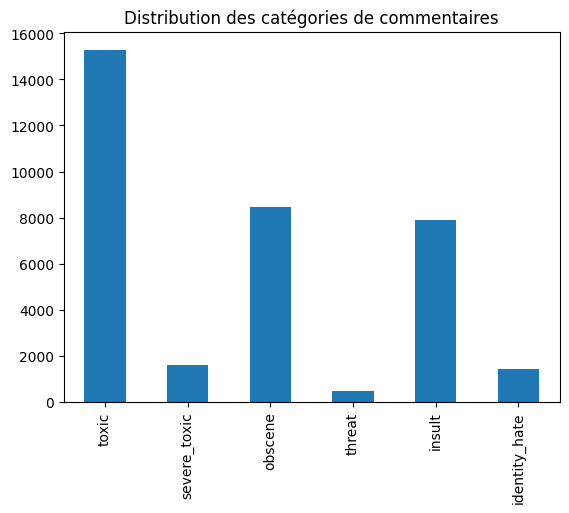

Pourcentage de chaque catégorie de commentaires :
toxic: 9.59%
severe_toxic: 1.00%
obscene: 5.30%
threat: 0.30%
insult: 4.94%
identity_hate: 0.88%


In [59]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data[categories].sum().plot(kind='bar')
plt.title('Distribution des catégories de commentaires')
plt.show()
# Calculer les sommes pour chaque catégorie
category_sums = data[categories].sum()
total_comments = len(data)

# Calculer les pourcentages et les afficher
print("Pourcentage de chaque catégorie de commentaires :")
for category in categories:
    percentage = 100 * category_sums[category] / total_comments
    print(f"{category}: {percentage:.2f}%")

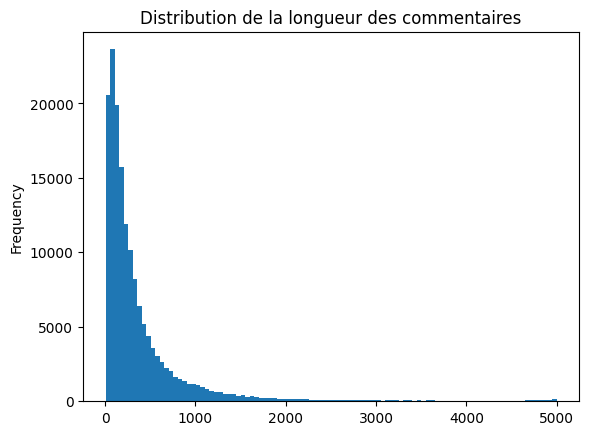

In [11]:
# Analyse de la longueur des commentaires
data['length'] = data['comment_text'].apply(len)
data['length'].plot(bins=100, kind='hist')
plt.title('Distribution de la longueur des commentaires')
plt.show()


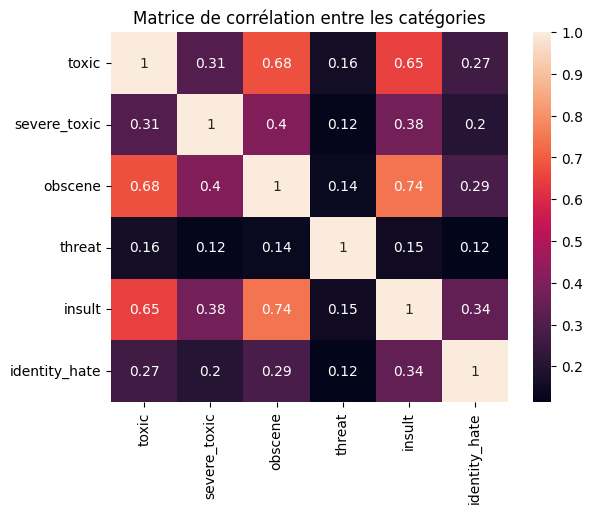

In [10]:
# Analyse de la corrélation entre les différentes catégories
sns.heatmap(data[categories].corr(), annot=True)
plt.title('Matrice de corrélation entre les catégories')
plt.show()

138147                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

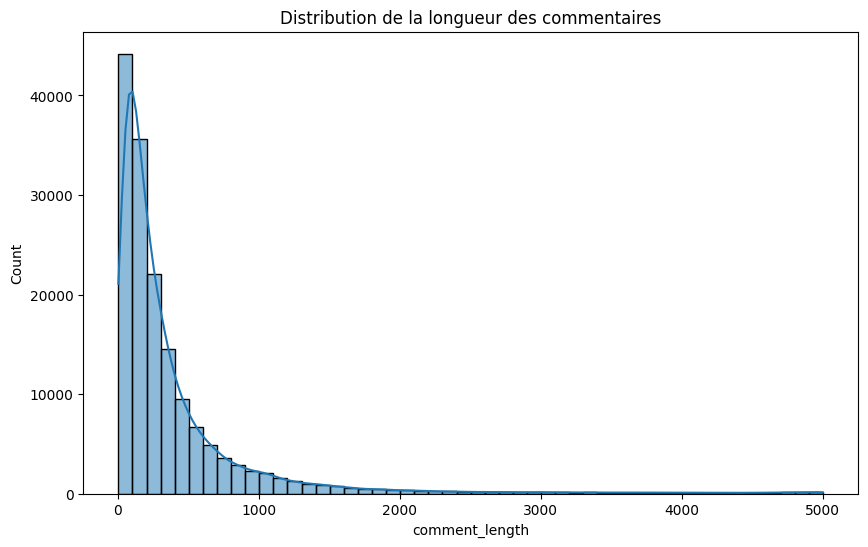

Mots les plus fréquents :
[('the', 445987), ('to', 288817), ('of', 219334), ('and', 207381), ('a', 201817), ('I', 183930), ('is', 164639), ('you', 157272), ('that', 140545), ('in', 130262), ('for', 96010), ('it', 92651), ('on', 84453), ('not', 83944), ('"', 81755), ('be', 80928), ('this', 71429), ('have', 69414), ('as', 68345), ('are', 66277), ('with', 56471), ('your', 55802), ('was', 52875), ('or', 48019), ('but', 42472), ('an', 41976), ('The', 39578), ('from', 39075), ('my', 38622), ('by', 38562), ('article', 37748), ('at', 36891), ('about', 34678), ('do', 31840), ('if', 31115), ('can', 30435), ('has', 30034), ('will', 28203), ('would', 28031), ('page', 27769), ('me', 25631), ('what', 25548), ('If', 25463), ('like', 25462), ('so', 24952), ('been', 24563), ('all', 23647), ('-', 23412), ('just', 23389), ('any', 23324)]


In [23]:
# Afficher un plus grand échantillon de données
print(data.sample(20)['comment_text'])

# Rechercher des patterns spécifiques (par exemple, URLs)
data['contains_url'] = data['comment_text'].apply(lambda x: bool(re.search(r'http[s]?://', x)))
print("Nombre de commentaires contenant des URLs:", data['contains_url'].sum())

# Analyser la longueur des commentaires
data['comment_length'] = data['comment_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['comment_length'], bins=50, kde=True)
plt.title('Distribution de la longueur des commentaires')
plt.show()

# Identifier les mots les plus fréquents
all_words = ' '.join([text for text in data['comment_text']])
word_freq = Counter(all_words.split())
print("Mots les plus fréquents :")

print(word_freq.most_common(50))

# Préparation des données

In [45]:
data['contains_url'] = data['comment_text'].apply(lambda x: bool(re.search(r'http[s]?://', x)))
print("Nombre de commentaires contenant des URLs:", data['contains_url'].sum())

Nombre de commentaires contenant des URLs: 4778


In [46]:
# Stratifide pour diviser les ds egalemenet
tokenizer = TweetTokenizer(strip_handles=True)
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
corpus = []

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# definir contractions et abreviations
contractions = contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

variable_name = ""
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [55]:

stop_words = set(stopwords.words('english'))

def clean(comment):
   

    for contraction, full_form in contractions.items():
        comment = re.sub(contraction, full_form, comment)

    # Remplacer les caractères spéciaux et les entités HTML
    comment = re.sub(r">", ">", comment)
    comment = re.sub(r"<", "<", comment)
    comment = re.sub(r"&", "&", comment)

    # Supprimer les URLs
    comment = re.sub(r"http\S+", "", comment)

    # Supprimer les chiffres
    comment = re.sub(r'\d+', '', comment)

    # Supprimer les mentions d'utilisateurs
    comment = re.sub(r"(@[A-Za-z0-9_]+)", "", comment)

    # Supprimer la ponctuation sauf les points d'exclamation
    for p in string.punctuation.replace('!', ''):
        comment = comment.replace(p, '')

    # Tokenisation
    comment_words = word_tokenize(comment)

    # Supprimer les stopwords et les mots de moins de 3 lettres, et convertir en minuscules
    comment = [word.lower() for word in comment_words if word.lower() not in stop_words and len(word) > 2]

    # Rejoindre les mots nettoyés pour former une phrase
    comment = ' '.join(comment)

    return comment

def convert_abbrev_in_text(comment): 
    t=[]
    words=comment.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t)

def prepare_string(comment):
  comment = clean(comment)
  comment = convert_abbrev_in_text(comment)
  return comment

# Exemple d'utilisation
example_comment = "This is an example comment! It contains a URL http://example.com and some numbers 1234."
cleaned_comment = clean(example_comment)
print(cleaned_comment)
cleaned_comment_2 = prepare_string(example_comment)
print(cleaned_comment_2)


example comment contains url numbers
example comment contains url numbers


In [56]:
%%time
# Apply prepare_string to all rows in 'comment_text' column
data['comment_text'] = data['comment_text'].apply(lambda s : prepare_string(s))

# Drop empty values from dataframe
data['comment_text'].replace('', np.nan, inplace=True)
data.dropna(subset=['comment_text'], inplace=True)

Wall time: 49.7 s


In [58]:
data.tail(25)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,contains_url,comment_length
159546,ffb47123b2d82762,hey listen ever delete edits ever annoyed wwe roster confirmed stupid ass deletes write stop please stop work wwe games stop deleting peoples shit get wrong others get wrong let get hang eventually stick ass gon delete please insert roster shit confirmed god stupid,1,0,0,0,1,0,534,False,534
159547,ffb7b4c3d3ae5842,thank much,0,0,0,0,0,0,30,False,30
159548,ffb93b0a0a1e78f9,talkback september,0,0,0,0,0,0,27,False,27
159549,ffb998f9749bd83e,coordinated universal time mar,0,0,0,0,0,0,25,False,25
159550,ffba5332d6b8fd14,agree another note lil wayne talentless man tupac still alive lil wayne whould broke audacity call gratest rapper alive,0,0,0,0,0,0,173,False,173
...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time asking view completely contradicts coverage reliable sources anyone care feel even give consistent argument opening supposed mention significant aspects significant ones,0,0,0,0,0,0,295,False,295
159567,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0,99,False,99
159568,ffee36eab5c267c9,spitzer umm theres actual article prostitution ring crunch captain,0,0,0,0,0,0,81,False,81
159569,fff125370e4aaaf3,looks like actually put speedy first version deleted look,0,0,0,0,0,0,116,False,116


In [64]:
# Créer une nouvelle colonne 'any_toxic'
# Elle prend la valeur 1 si l'une des catégories spécifiées est à 1, sinon 0
data['any_toxic'] = data[categories].any(axis=1).astype(int)

# Afficher les premières lignes pour vérifier
data.head(((60)))


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,contains_url,comment_length,any_toxic
0,0000997932d777bf,explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired,0,0,0,0,0,0,264,False,264,0
1,000103f0d9cfb60f,daww matches background colour seemingly stuck thanks talk january coordinated universal time,0,0,0,0,0,0,112,False,112,0
2,000113f07ec002fd,hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info,0,0,0,0,0,0,233,False,233,0
3,0001b41b1c6bb37e,make real suggestions improvement wondered section statistics later subsection types accidents think references may need tidying exact format date format and so on later noone else first preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns listed relevant form example wikipediagoodarticlenominationstransport,0,0,0,0,0,0,622,False,622,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,False,67,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55,0020e7119b96eeeb,stupid peace shit stop deleting stuff asshole die fall hole hell,1,1,1,0,1,0,89,False,89,1
56,0020fd96ed3b8c8b,tony sidaway obviously fistfuckee loves arm ass,1,0,1,0,1,0,68,False,68,1
57,00218d74784ce50b,review sorry say fail articles gan several major problems brought articles previous assessment issued said articles wplead longer history media attention academics student government demographics trivia additional information section deficient citiations also triva additional information integrated rest article please look wpwiaga fix problem renominate gaclass however reassessed article bclass meet bclass criteria regards,0,0,0,0,0,0,692,False,692,0
58,0021fe88bc4da3e6,band pages deletion thought gone deleting comment posted talk page delete feelings hasty decision delete page sir still cocksucking douche fuck sit back second think life become done take long nope certainly aware life shitstorm sitting front computer masturbating fictional creatures attempts get rid mediocre best constantly sucking dick failure want personal attack huh well bad fuckcock mcdickerson youve got one ahead delete profile wikipedia make another one come right back syrthisss talk page insult dick could shatter dreams innocent eighteen year old college freshman trying make name band make happy fucking people overweight single old man deadend job spot perhaps someone else going follow dreams trying hold back somebody else could suffer like yes make empty threats saying anything along lines ill hurt ill eat children within sisters womb say asshole sonofabitch mother fucking cock sucker eat food drown sorrows premature ejaculating bald headed fuck something nice maybe grab couple horny greatest time weeds local convenience store jack little longer three minutes tonight sincerely asshole thats better every way,1,0,1,0,0,0,1798,False,1798,1


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Pas besoin de limiter la taille du corpus
comments = data['comment_text']
y = data['any_toxic']

# Vectorisation TF-IDF avec un plus grand nombre de features
tfIdfVectorizer = TfidfVectorizer(max_features=10000)  # Augmentation du nombre de features
X = tfIdfVectorizer.fit_transform(comments)

# Division des données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du classificateur avec plus d'estimateurs
text_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
text_classifier.fit(X_train, y_train)

# Prédiction et évaluation
predictions = text_classifier.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


# Entraînement du modèle baseline

In [ ]:
# Your Code

# Itération de la modélisation 

In [ ]:
# Your Code 